# Kaggle Machine Learning Competition: StumbleUpon Evergreen Classification Challenge

## Competition Site

Description, Evaluation, and Data Set taken from the [competition site](https://www.kaggle.com/c/stumbleupon/overview).

## Description

![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/3526/media/stumbleupon_evergreen.jpg)

StumbleUpon is a user-curated web content discovery engine that recommends relevant, high quality pages and media to its users, based on their interests. While some pages we recommend, such as news articles or seasonal recipes, are only relevant for a short period of time, others maintain a timeless quality and can be recommended to users long after they are discovered. In other words, pages can either be classified as "ephemeral" or "evergreen". The ratings we get from our community give us strong signals that a page may no longer be relevant - but what if we could make this distinction ahead of time? A high quality prediction of "ephemeral" or "evergreen" would greatly improve a recommendation system like ours.

Many people know evergreen content when they see it, but can an algorithm make the same determination without human intuition? Your mission is to build a classifier which will evaluate a large set of URLs and label them as either evergreen or ephemeral. Can you out-class(ify) StumbleUpon? As an added incentive to the prize, a strong performance in this competition may lead to a career-launching internship at one of the best places to work in San Francisco.

## Evaluation

Submissions are judged on [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

**Submission Format**:
    Each line of your submission should contain an urlid and a label
    
|  urlid |  label |
|--------|--------|
|  5865  |  0.91  |
|  6962  |  0.12  |
|........|........|

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .tsv (22 Mb)      |
| test             | .tsv (9.4 Mb)     |

**Note**: researchers who wish to use this data outside the competition should download and read the data access agreement.

There are two components to the data provided for this challenge:

The first component is two files: train.tsv and test.tsv. Each is a tab-delimited text file containing the fields outlined below for 10,566 urls total. Fields for which no data is available are indicated with a question mark.

train.tsv  is the training set and contains 7,395 urls. Binary evergreen labels (either evergreen (1) or non-evergreen (0)) are provided for this set.
test.tsv is the test/evaluation set and contains 3,171 urls.
The second component is raw_content.zip, a zip file containing the raw content for each url, as seen by StumbleUpon's crawler. Each url's raw content is stored in a tab-delimited text file, named with the urlid as indicated in train.tsv and test.tsv.

The following table includes field descriptions for train.tsv and test.tsv:

<pre>
VARIABLE DESCRIPTIONS:
    
FieldName                        Type                  Description

url                               string               Url of the webpage to be classified

urlid                             integer              StumbleUpon's unique identifier for each url

boilerplate                       json                 Boilerplate text

alchemy_category                  string               Alchemy category (per the publicly available
                                                       Alchemy API found at www.alchemyapi.com)
                                                       
alchemy_category_score            double               Alchemy category score (per the publicly available
                                                       AlchemyAPI found at www.alchemyapi.com)
                                                       
avglinksize                       double               Average number of words in each link

commonLinkRatio_1                 double	           # of links sharing at least 1 word with
                                                       1 other links / # of links
                                                       
commonLinkRatio_2                 double               # of links sharing at least 1 word with
                                                       2 other links / # of links
                                                       
commonLinkRatio_3                 double               # of links sharing at least 1 word with
                                                       3 other links / # of links
                                                       
commonLinkRatio_4                 double               # of links sharing at least 1 word with
                                                       4 other links / # of links
                                                       
compression_ratio                 double               Compression achieved on this page via gzip
                                                       (measure of redundancy)
                                                       
embed_ratio                       double               Count of number of < embed >  usage

frameBased                        integer (0 or 1)	 A page is frame-based (1) if it has no body markup
                                                       but have a frameset markup
                                                       
frameTagRatio                     double               Ratio of iframe markups over total number of markups

hasDomainLink                     integer (0 or 1)	 True (1) if it contains an < a > with an url
                                                       with domain

html_ratio                        double               Ratio of tags vs text in the page

image_ratio                       double               Ratio of < img > tags vs text in the page

is_news                           integer (0 or 1)	 True (1) if StumbleUpon's news classifier determines
                                                       that this webpage is news
                                                       
lengthyLinkDomain                 integer (0 or 1)	 True (1) if at least 3 < a > 's text contains
                                                       more than 30 alphanumeric characters
                                                       
linkwordscore                     double               Percentage of words on the page that are in
                                                       hyperlink's text
                                                       
news_front_page                   integer (0 or 1)   True (1) if StumbleUpon's news classifier determines
                                                       that this webpage is front-page news
                                                       
non_markup_alphanum_characters    integer              Page's text's number of alphanumeric characters

numberOfLinks                     integer              Number of < a >  markups

numwords_in_url                   double               Number of words in url

parametrizedLinkRatio             double               A link is parametrized if it's url contains
                                                       parameters or has an attached onClick event
                                                       
spelling_errors_ratio             double               Ratio of words not found in wiki
                                                       (considered to be a spelling mistake)
                                                       
label                             integer (0 or 1)	 User-determined label. Either evergreen (1) or
                                                       non-evergreen (0); available for train.tsv only
<pre>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, roc_auc_score


import json
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.punkt import PunktToken
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import lda
from sklearn.decomposition import TruncatedSVD

from urllib.parse import urlparse

import warnings
warnings.filterwarnings('ignore')

In [ ]:
he

## Explore the Data

**Read data**

In [2]:
dataTrain = pd.read_csv('train.tsv', delimiter='\t',encoding='utf-8')
dataTest = pd.read_csv('test.tsv', delimiter='\t',encoding='utf-8')

**Concat data train and data test**

In [3]:
dataAll = dataTrain.append(dataTest, ignore_index=True)
dataAll['Type'] = 'training'
dataAll['Type'][np.isnan(dataAll.label)] = 'testing'

**Access data**

In [5]:
dataAll.head(10).T

,0,1,2,3,4,5,6,7,8,9
url,http://www.bloomberg.com/news/2010-12-23/ibm-p...,http://www.popsci.com/technology/article/2012-...,http://www.menshealth.com/health/flu-fighting-...,http://www.dumblittleman.com/2007/12/10-foolpr...,http://bleacherreport.com/articles/1205138-the...,http://www.conveniencemedical.com/genital-herp...,http://gofashionlane.blogspot.tw/2012/06/ameri...,http://www.insidershealth.com/article/racing_f...,http://www.valetmag.com/the-handbook/features/...,http://www.howsweeteats.com/2010/03/24/cookies...
urlid,4042,8471,1164,6684,9006,7018,8685,3402,477,6731
boilerplate,"{""title"":""IBM Sees Holographic Calls Air Breat...","{""title"":""The Fully Electronic Futuristic Star...","{""title"":""Fruits that Fight the Flu fruits tha...","{""title"":""10 Foolproof Tips for Better Sleep ""...","{""title"":""The 50 Coolest Jerseys You Didn t Kn...","{""url"":""conveniencemedical genital herpes home...","{""title"":""fashion lane American Wild Child "",""...","{""url"":""insidershealth article racing for reco...","{""title"":""Valet The Handbook 31 Days 31 days"",...","{""url"":""howsweeteats 2010 03 24 cookies and cr..."
alchemy_category,business,recreation,health,health,sports,?,arts_entertainment,?,?,?
alchemy_category_score,0.789131,0.574147,0.996526,0.801248,0.719157,?,0.22111,?,?,?
avglinksize,2.05556,3.67797,2.38288,1.5431,2.67647,119,0.77381,1.88333,0.471503,2.41011
commonlinkratio_1,0.676471,0.508021,0.562016,0.4,0.5,0.745455,0.215054,0.719697,0.190722,0.469325
commonlinkratio_2,0.205882,0.28877,0.321705,0.1,0.222222,0.581818,0.0537634,0.265152,0.0360825,0.101227
commonlinkratio_3,0.0470588,0.213904,0.120155,0.0166667,0.123457,0.290909,0.0430108,0.113636,0,0.0184049
commonlinkratio_4,0.0235294,0.144385,0.0426357,0,0.0432099,0.0181818,0.0430108,0.0151515,0,0.00306749


In [5]:
dataAll[7680:7690]

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,Type
7680,http://www.amazingsuperpowers.com/2008/07/shar...,480,"{""title"":""Webcomic at the Speed of Light Shark...",science_technology,0.480736,1.762821,0.592357,0.267516,0.248408,0.242038,...,0,36,0,2226,157,2,0.254777,0.092308,NaN,testing
7681,http://www.cbc.ca/news/health/story/2011/02/23...,2457,"{""title"":""Cannabis whets appetite for cancer p...",?,?,2.951389,0.549383,0.290123,0.154321,0.055556,...,1,32,0,4846,162,5,0.092593,0.055066,NaN,testing
7682,http://www.rollingstone.com/music/photos/lady-...,5362,"{""title"":""Lady Gaga s Best Looks Pictures lady...",arts_entertainment,0.667,3.078261,0.567376,0.170213,0.056738,0.014184,...,1,74,0,634,141,6,0.163121,0.056818,NaN,testing
7683,https://www.thehunt.com/?page=174,7722,"{""title"":""What are you hunting for "",""body"":""S...",recreation,0.238356,2.733333,0.277228,0.059406,0.019802,0.000000,...,0,27,0,1620,101,1,0.059406,0.098655,NaN,testing
7684,http://www.epicurious.com/articlesguides/holid...,7940,"{""title"":""Easy Thanksgiving Recipes and Tips T...",culture_politics,0.644755,2.313253,0.560976,0.331010,0.080139,0.041812,...,1,26,0,8070,287,5,0.101045,0.091013,NaN,testing
7685,http://bakedbree.com/2010/02/peanut-butter-pie/,6104,"{""title"":""Peanut Butter Pie Recipe peanut butt...",?,?,2.297619,0.625000,0.291667,0.291667,0.291667,...,0,12,?,6031,120,3,0.325000,0.080189,NaN,testing
7686,http://fashion.elle.com/street-chic/,8853,"{""title"":""Street Fashion New York Street Fashi...",arts_entertainment,0.466948,1.723810,0.621495,0.252336,0.051402,0.004673,...,0,51,0,1646,214,2,0.056075,0.083333,NaN,testing
7687,http://shine.yahoo.com/channel/food/11-best-fa...,5813,"{""title"":""11 Best Fast Food Post Workout Snack...",business,0.59501,1.592105,0.229358,0.134557,0.064220,0.036697,...,1,10,0,21097,327,9,0.119266,0.078591,NaN,testing
7688,http://www.thatssotrue.com/view/story/2352,4769,"{""title"":""Sending your boyfriend A heartfelt t...",?,?,0.818182,0.073529,0.058824,0.000000,0.000000,...,0,23,0,992,68,2,0.558824,0.116667,NaN,testing
7689,http://asouthernfairytale.com/2011/07/11/homem...,2544,"{""title"":"" "",""body"":"" "",""url"":""asouthernfairyt...",arts_entertainment,0.627775,1.944206,0.702929,0.317992,0.301255,0.288703,...,1,15,0,11114,239,3,0.305439,0.250000,NaN,testing


**Data information**

In [6]:
dataAll.shape

(10566, 28)

In [7]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10566 entries, 0 to 10565
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             10566 non-null  object 
 1   urlid                           10566 non-null  int64  
 2   boilerplate                     10566 non-null  object 
 3   alchemy_category                10566 non-null  object 
 4   alchemy_category_score          10566 non-null  object 
 5   avglinksize                     10566 non-null  float64
 6   commonlinkratio_1               10566 non-null  float64
 7   commonlinkratio_2               10566 non-null  float64
 8   commonlinkratio_3               10566 non-null  float64
 9   commonlinkratio_4               10566 non-null  float64
 10  compression_ratio               10566 non-null  float64
 11  embed_ratio                     10566 non-null  float64
 12  framebased                      

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

**Understading data**

In [8]:
dataAll.describe().T

,count,mean,std,min,25%,50%,75%,max
urlid,10566.0,5283.500000,3050.285806,1.000000,2642.250000,5283.500000,7924.750000,10566.000000
avglinksize,10566.0,2.823754,12.904732,0.000000,1.605949,2.084034,2.615385,1062.000000
commonlinkratio_1,10566.0,0.467895,0.201926,0.000000,0.339668,0.480193,0.614852,1.000000
commonlinkratio_2,10566.0,0.212166,0.146180,0.000000,0.103896,0.200000,0.297872,1.000000
commonlinkratio_3,10566.0,0.091431,0.095443,0.000000,0.021505,0.067416,0.132743,0.980392
commonlinkratio_4,10566.0,0.048837,0.072308,0.000000,0.000000,0.021368,0.064516,0.980392
compression_ratio,10566.0,2.291272,5.757324,0.000000,0.442374,0.483160,0.580402,21.000000
embed_ratio,10566.0,-0.104571,0.307991,-1.000000,0.000000,0.000000,0.000000,0.928571
framebased,10566.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frameTagRatio,10566.0,0.056923,0.042005,0.000000,0.028610,0.046436,0.074074,0.444444


In [9]:
def info_columns(data_):
    total_na = data_.isna().sum().sum()
    print("Dimensional:", data_.shape[0], "rows,", data_.shape[1], "columns")
    print("Total NA values: %d" %(total_na))
    print("%38s%10s%10s%10s" %("Column Name", "Data type", "#Distinct", "#NaN"))
    col_name = data_.columns
    dtype = data_.dtypes
    uniq = data_.nunique()
    
    for i in range(len(col_name)):
        print("%38s%10s%10s%10s" %(col_name[i], dtype[i], uniq[i], data_[col_name[i]].isna().sum()))

info_columns(dataAll)

Dimensional: 10566 rows, 28 columns
Total NA values: 3171
                           Column Name Data type #Distinct      #NaN
                                   url    object     10566         0
                                 urlid     int64     10566         0
                           boilerplate    object     10565         0
                      alchemy_category    object        14         0
                alchemy_category_score    object      6776         0
                           avglinksize   float64      7634         0
                     commonlinkratio_1   float64      5731         0
                     commonlinkratio_2   float64      5119         0
                     commonlinkratio_3   float64      4118         0
                     commonlinkratio_4   float64      3347         0
                     compression_ratio   float64      9085         0
                           embed_ratio   float64       485         0
                            framebased     in

**Categorical data**

In [10]:
def infor_type(data_, type_column):
    categorical = [var for var in data_.columns if data_[var].dtype == type_column]
    for var in categorical:
        print(data_[var].value_counts())

In [11]:
name_type = ['object', 'int', 'float']
for name in name_type:
    print(infor_type(dataAll, name))
    print('===========*****************************============')

http://www.geek.com/articles/chips/futuristic-minority-report-computer-interface-makes-a-real-life-debut-20100217/    1
http://www.mentalfloss.com/amazingfactgenerator?p=909                                                                 1
http://qdb.us/97707                                                                                                   1
http://www.smbc-comics.com/index.php?db=comics&id=1334                                                                1
http://www.longhornleads.com/blog/2012/10-ways-to-make-sure-your-blog-supports-semantic-search/                       1
                                                                                                                     ..
http://www.youtube.com/watch?v=bg7pDvUhfes                                                                            1
http://www.sacredchocolate.com/                                                                                       1
http://www.epicurious.com/recipesmenus/d

<!-- ## **1.2.Visualize numeric variable** -->

# **Pre-processing Data**

## Features: url

In [12]:
dataAll['url']

0        http://www.bloomberg.com/news/2010-12-23/ibm-p...
1        http://www.popsci.com/technology/article/2012-...
2        http://www.menshealth.com/health/flu-fighting-...
3        http://www.dumblittleman.com/2007/12/10-foolpr...
4        http://bleacherreport.com/articles/1205138-the...
                               ...                        
10561    http://busy-mommy.com/2012/02/peep-brownie-smo...
10562    http://www.cannabissearch.com/edibles/cheesecake/
10563    http://www.tastespotting.com/popular/views/all...
10564    http://lifehacker.com/5839197/how-to-get-a-ful...
10565    http://www.howsweeteats.com/2011/03/crispy-par...
Name: url, Length: 10566, dtype: object

**Bây h sẽ tách các thành phần của url theo cấu trúc của url link:**

urlparse:

In [13]:
testurlparse = urlparse('http://www.popsci.com/technology/article/2012-07/electronic')
testurlparse

ParseResult(scheme='http', netloc='www.popsci.com', path='/technology/article/2012-07/electronic', params='', query='', fragment='')

Count paths in urllink

In [14]:
def countPaths(url):
    parsed = urlparse(url)
    domain = re.findall('\/',parsed.path)
    return len(domain)

# Eg:
countPaths('http://www.popsci.com/technology/article/2012-07/electronic')

4

In [18]:
countdot = []
for url in dataAll['url']:
    parsed = urlparse(url)
    domainname = parsed.netloc.lower().split('.')
    countdot.append(len(domainname))
    
set(countdot)

{2, 3, 4, 5}

Thấy độ sâu tối đa url là 5 nên ta sẽ lấy tên theo từng [tầng domain](https://en.wikipedia.org/wiki/Domain_name)

In [16]:
def getInforFromUrl(data_):
    shape = data_['url'].shape[0]
    domain_1st, domain_2nd = ['' for x in range(shape)], ['' for x in range(shape)]
    domain_3rd = ['' for x in range(shape)]
    domain_4th, domain_5th = ['' for x in range(shape)], ['' for x in range(shape)]
    websitetype, websitetype2 = ['' for x in range(shape)], ['' for x in range(shape)]
    numpath = []
    for i, url in enumerate(data_['url']):
        numpath.append(countPaths(url))
        
        parsed = urlparse(url)
        domainname = parsed.netloc.lower().split('.')
        if len(domainname) == 2: 
            domain_2nd[i] = domainname[0]
            domain_1st[i] = domainname[1]
        if len(domainname) == 3:
            domain_3rd[i], domain_2nd[i] = domainname[0], domainname[1]
            domain_1st[i] = domainname[2]
        if len(domainname) == 4:
            domain_4th[i], domain_3rd[i] = domainname[0], domainname[1]
            domain_2nd[i], domain_1st[i] = domainname[2], domainname[3]
        if len(domainname) == 5:
            domain_5th[i], domain_4th[i], domain_3rd[i] = domainname[0], domainname[1], domainname[2]
            domain_2nd[i], domain_1st[i] = domainname[3], domainname[4]

        pathresub = parsed.path
        punctuation = ['/', '-', '_', '\.', ':']
        for punc in punctuation:
            pathresub = re.sub(punc, ' ', pathresub)
        pathresub = pathresub.lower().split(' ')
        if len(pathresub) == 2:
            websitetype[i] = pathresub[1]
        else:
            websitetype[i], websitetype2[i] = pathresub[1], pathresub[2]
    
    # Create DataFrame from url
    dfFromUrl = pd.DataFrame({'domain_1st': domain_1st, 'domain_2nd': domain_2nd, 'domain_3rd': domain_3rd,
                             'domain_4th': domain_4th, 'domain_5th': domain_5th,
                             'website_type': websitetype, 'website_type2': websitetype2, 'numPath': numpath})
    
    dfFromUrl['website_type'] = dfFromUrl['website_type'].replace({'2006':'YEAR', '2007':'YEAR', '2008':'YEAR',
                                '2009':'YEAR','2010':'YEAR', '2011':'YEAR', '2012':'YEAR','2013':'YEAR',
                            '01':'MONTH', '02':'MONTH','03':'MONTH','04':'MONTH','05':'MONTH','06':'MONTH',
                            '07':'MONTH','08':'MONTH','09':'MONTH','10':'MONTH','11':'MONTH','12':'MONTH'})
    
    dfFromUrl['website_type2'] = dfFromUrl['website_type2'].replace({'2006':'YEAR', '2007':'YEAR', '2008':'YEAR', 
                              '2009':'YEAR', '2010':'YEAR','2011':'YEAR', '2012':'YEAR','2013':'YEAR',
                            '01':'MONTH', '02':'MONTH','03':'MONTH','04':'MONTH','05':'MONTH','06':'MONTH',
                            '07':'MONTH','08':'MONTH','09':'MONTH','10':'MONTH','11':'MONTH','12':'MONTH',})
    
    return dfFromUrl

In [17]:
dfFromUrl = getInforFromUrl(dataAll)
dfFromUrl

,domain_1st,domain_2nd,domain_3rd,domain_4th,domain_5th,website_type,website_type2,numPath
0,com,bloomberg,www,,,news,YEAR,3
1,com,popsci,www,,,technology,article,4
2,com,menshealth,www,,,health,flu,2
3,com,dumblittleman,www,,,YEAR,MONTH,3
4,com,bleacherreport,,,,articles,1205138,2
...,...,...,...,...,...,...,...,...
10561,com,busy-mommy,,,,YEAR,MONTH,3
10562,com,cannabissearch,www,,,edibles,cheesecake,3
10563,com,tastespotting,www,,,popular,views,4
10564,com,lifehacker,,,,5839197,how,2


## Features: linkwordscore

In [18]:
dataAll['linkwordscore']

0        24
1        40
2        55
3        24
4        14
         ..
10561    16
10562     6
10563    19
10564     3
10565    14
Name: linkwordscore, Length: 10566, dtype: int64

In [19]:
print('Values of linkwordscore: ',  np.array(set(dataAll['linkwordscore'])))
print('Length of linkwordscore: ', len(set(dataAll['linkwordscore'])))

Values of linkwordscore:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Length of linkwordscore:  101


In [20]:
dataAll['linkwordscore'].value_counts()

16    286
13    281
19    269
18    266
14    265
     ... 
98      4
97      3
99      3
96      2
94      2
Name: linkwordscore, Length: 101, dtype: int64

**Visualization Evergreen rate from linkwordscore**

In [21]:
linkwordscore_xt = pd.crosstab(dataTrain['linkwordscore'], dataTrain['label'])
linkwordscore_xt

label,0,1
linkwordscore,,
0,30,18
1,9,18
2,26,23
3,36,53
4,41,65
...,...,...
96,0,1
97,3,0
98,2,1


Text(0, 0.5, 'Evergreen Rate')

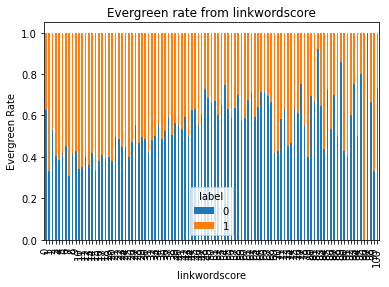

In [22]:
linkwordscore_xt_pct = linkwordscore_xt.div(linkwordscore_xt.sum(1).astype(float), axis=0)
linkwordscore_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Evergreen rate from linkwordscore')
plt.xlabel('linkwordscore')
plt.ylabel('Evergreen Rate')

Bây h sẽ lấy xác suất ra label từ linkscore, sử dụng hàm sigmoid:

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
def new_link_pre(data_):
    linktrain1 = set(data_[data_['label'] == 1]['linkwordscore'].values)
    linktrain0 = set(data_[data_['label'] == 0]['linkwordscore'].values)
    link = list(linktrain1.intersection(linktrain0))
    
    val_count1 = []
    val_count0 = []
    for x in link:
        ah = data_[data_['linkwordscore'] == x]['label'].value_counts()
        val_count0.append(ah[0])
        val_count1.append(ah[1])
        
    for x in list(linktrain0 - linktrain1):
        link.append(x)
        val_count0.append(data_[data_['linkwordscore'] == x]['label'].value_counts()[0])
        val_count1.append(0)
    for x in list(linktrain1 - linktrain0):
        link.append(x)
        val_count1.append(data_[data_['linkwordscore'] == x]['label'].value_counts()[1])
        val_count0.append(0)
        
    rel = []
    for x in range(len(link)):
        prob_1 = val_count1[x] / (val_count0[x] + val_count1[x])
        if prob_1 <= 0.4:
            rel.append(sigmoid(-prob_1 - 1.5*(1-prob_1)))
            
        elif prob_1 >= 0.6:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x]) 
            rel.append(sigmoid(prob_1*1.5 + (1-prob_1)))
            
        else:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x])
            rel.append(sigmoid(1.5*(prob_1 - (1-prob_1))))
    
    # Create DataFrame from linkwordscore
    linkpd = pd.DataFrame({'linkscore': link, 'label = 1': val_count1,
                           'label = 0': val_count0,'result_prob': rel})

    relsprob = []
    for x in data_['linkwordscore'].values:
        relsprob.append(linkpd[linkpd['linkscore'] == x]['result_prob'].values[0])
    
    return relsprob, linkpd

In [25]:
probFrom_lws, linkpd = new_link_pre(dataAll[dataAll['Type']=='training'])
linkpd

,linkscore,label = 1,label = 0,result_prob
0,0,18,30,0.164516
1,1,18,9,0.841131
2,2,23,26,0.469426
3,3,53,36,0.594361
4,4,65,41,0.833856
...,...,...,...,...
96,98,1,2,0.158869
97,99,2,1,0.841131
98,100,3,8,0.150937
99,97,0,3,0.119203


## Features: lengthyLinkDomain and numberOfLinks

In [26]:
dataAll['lengthyLinkDomain'].value_counts()

1    6914
0    3652
Name: lengthyLinkDomain, dtype: int64

In [27]:
dataAll['numberOfLinks'].value_counts()

142     86
37      80
121     79
123     66
120     65
        ..
3283     1
1546     1
1626     1
483      1
787      1
Name: numberOfLinks, Length: 750, dtype: int64

**Visualization lengthyLinkDomain rate from numberOfLinks**

In [28]:
numberOfLinks_xt = pd.crosstab(dataAll['numberOfLinks'], dataAll['lengthyLinkDomain'])
numberOfLinks_xt

lengthyLinkDomain,0,1
numberOfLinks,,
1,26,0
2,33,0
3,18,0
4,18,0
5,23,0
...,...,...
2371,0,1
2406,0,1
3283,0,1


Text(0, 0.5, 'lengthyLinkDomain rate')

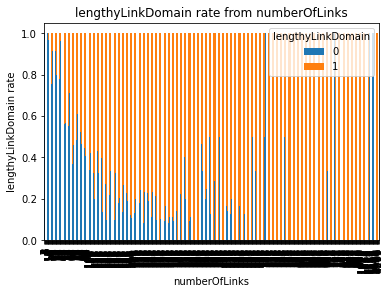

In [29]:
numberOfLinks_xt_pct = numberOfLinks_xt.div(numberOfLinks_xt.sum(1).astype(float), axis=0)
numberOfLinks_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='lengthyLinkDomain rate from numberOfLinks')
plt.xlabel('numberOfLinks')
plt.ylabel('lengthyLinkDomain rate')

Bây h sẽ lấy xác suất ra lengthyLinkDomain từ numberOfLinks, sử dụng hàm sigmoid:

In [30]:
def lld_nol_pre(df_train):
    linktrain1 = set(df_train[df_train['lengthyLinkDomain'] == 1]['numberOfLinks'].values)
    linktrain0 = set(df_train[df_train['lengthyLinkDomain'] == 0]['numberOfLinks'].values)
    link = list(linktrain1.intersection(linktrain0))
    
    val_count1 = []
    val_count0 = []
    for x in link:
        ah = df_train[df_train['numberOfLinks'] == x]['lengthyLinkDomain'].value_counts()
        val_count0.append(ah[0])
        val_count1.append(ah[1])
        
    for x in list(linktrain0 - linktrain1):
        link.append(x)
        val_count0.append(df_train[df_train['numberOfLinks'] == x]['lengthyLinkDomain'].value_counts()[0])
        val_count1.append(0)
    for x in list(linktrain1 - linktrain0):
        link.append(x)
        val_count1.append(df_train[df_train['numberOfLinks'] == x]['lengthyLinkDomain'].value_counts()[1])
        val_count0.append(0)
        
    rel = []
    for x in range(len(link)):
        prob_1 = val_count1[x] / (val_count0[x] + val_count1[x])
        if prob_1 <= 0.4:
            rel.append(sigmoid(-prob_1 - 2*(1-prob_1)))
            
        elif prob_1 >= 0.6:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x]) 
            rel.append(sigmoid(prob_1*2 + (1-prob_1)))
            
        else:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x]) 
            rel.append(sigmoid(2*(prob_1 - (1-prob_1))))
    
    linkpd = pd.DataFrame({'numberOfLinks': link, 'lengthyLinkDomain = 1': val_count1,
                           'lengthyLinkDomain = 0': val_count0, 'result_prob': rel})

    relsprob = []
    for x in df_train['numberOfLinks'].values:
        relsprob.append(linkpd[linkpd['numberOfLinks'] == x]['result_prob'].values[0])
    
    return relsprob, linkpd

In [31]:
probFrom_nol_lld, lld_nol_pre_df = lld_nol_pre(dataAll)
lld_nol_pre_df

,numberOfLinks,lengthyLinkDomain = 1,lengthyLinkDomain = 0,result_prob
0,7,1,16,0.125519
1,9,1,21,0.124059
2,10,1,29,0.122747
3,12,3,24,0.131371
4,14,4,33,0.131029
...,...,...,...,...
745,1507,1,0,0.880797
746,1546,1,0,0.880797
747,1612,1,0,0.880797
748,1626,1,0,0.880797


### Consum featurizes data

In [32]:
def featurizes(data_, dfFromUrl, probFrom_lws_, linkpd, probFrom_nol_lld):
    # Concat data_ vs dfFromUrl
    new_data = pd.concat([data_, dfFromUrl], axis= 1)
    
    # Chuyển alchemy_category_score sang dạng numeric và fill na = giá trị mean
    new_data['alchemy_category_score'] = pd.to_numeric(new_data['alchemy_category_score'], errors= 'coerce')
    new_data['alchemy_category_score'].fillna(new_data['alchemy_category_score'].mean(), inplace= True)
    
    # One hot columns
    domains1_df = pd.get_dummies(list(new_data['domain_1st']), prefix = 'DUM')
    domains4_df = pd.get_dummies(list(new_data['domain_4th']), prefix = 'DUM')
    alchemyCategories_df = pd.get_dummies(new_data.alchemy_category, prefix = 'DUM')
    num_word_url_df = pd.get_dummies(new_data.numwords_in_url, prefix = 'DUM')
    numPaths_df = pd.get_dummies(list(new_data['numPath']), prefix = 'DUM')
    new_data = pd.concat([new_data, domains1_df, domains4_df, alchemyCategories_df,
                       num_word_url_df, numPaths_df], axis= 1)
    
    # Create column numword in HLT
    new_data['wordInHLT'] = new_data['non_markup_alphanum_characters'] * new_data['linkwordscore'] / 100
    
    # Create column wordError each page
    new_data['wordError'] = new_data['non_markup_alphanum_characters'] * new_data['spelling_errors_ratio']
    
    # Create column 
    new_data['lld_nol_prob'] = probFrom_nol_lld
    
    # Create column linkscoreprob
    prob = []
    for x in new_data[new_data['Type']=='testing']['linkwordscore'].values:
        probFrom_lws_.append(linkpd[linkpd['linkscore'] == x]['result_prob'].values[0])
    new_data['linkscoreprob'] = probFrom_lws_
    
    # Drop column
    new_data.drop(columns= ['framebased','url', 'alchemy_category', 'numwords_in_url', 'news_front_page',
                         'urlid', 'boilerplate', 'is_news', 'domain_1st', 'domain_4th'], inplace= True)
    
    # Encoder
    le = LabelEncoder()
    fea = ['domain_2nd','domain_3rd', 'domain_5th', 'website_type', 'website_type2']
    for x in fea:
        le.fit(new_data[x])
        new_data[x] = le.transform(new_data[x])
    
    return new_data

In [34]:
newDataAll = dataAll.copy()
newDataAll = featurizes(newDataAll, dfFromUrl, probFrom_lws, linkpd, probFrom_nol_lld)

In [36]:
info_columns(newDataAll)

Dimensional: 10566 rows, 167 columns
Total NA values: 3171
                           Column Name Data type #Distinct      #NaN
                alchemy_category_score   float64      6776         0
                           avglinksize   float64      7634         0
                     commonlinkratio_1   float64      5731         0
                     commonlinkratio_2   float64      5119         0
                     commonlinkratio_3   float64      4118         0
                     commonlinkratio_4   float64      3347         0
                     compression_ratio   float64      9085         0
                           embed_ratio   float64       485         0
                         frameTagRatio   float64      7919         0
                         hasDomainLink     int64         2         0
                            html_ratio   float64     10531         0
                           image_ratio   float64      7324         0
                     lengthyLinkDomain     i

In [37]:
# def getColumnsFromBoilerplate(data_):
#     boilerplate = data_['boilerplate']

#     dicts = {
#         'title' : [],
#         'body' : [],
#         'url' : []
#     }
    
#     for i in range(len(boilerplate)):
#         temp = json.loads(boilerplate[i])
#         for j in dicts.keys():
#             dicts[j].append(temp.get(j, None))

#     boilerplate_df = pd.DataFrame()
#     boilerplate_df['title'] = dicts['title']
#     boilerplate_df['body'] = dicts['body']
    
#     return boilerplate_df

In [38]:
# boilerplateAll_df = getColumnsFromBoilerplate(dataAll)
# info_columns(boilerplateAll_df)

In [39]:
# def fillNanAndNone(data_):
#     fea = ['title', 'body']
#     for name in fea:
#         data_[name].fillna(" ", inplace= True)
#     return data_

# boilerplateAll_df = fillNanAndNone(boilerplateAll_df)
# info_columns(boilerplateAll_df)

In [40]:
stop_words = stopwords.words('english')
stop_word_add = ['becau','abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv']
for i in stop_word_add:
    stop_words.append(i)
    
def preprocessor(text):
    text = re.sub('[\W0-9]+', ' ', text.lower())
    return text

porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [43]:
boilerVect = TfidfVectorizer(stop_words= stop_words, tokenizer= tokenizer_porter, preprocessor= preprocessor).fit_transform(dataAll['boilerplate'])
boilerDecomposed = TruncatedSVD(random_state = 42, n_components = 200).fit_transform(boilerVect)

In [44]:
boilerVect.shape, boilerDecomposed.shape

((10566, 75195), (10566, 200))

In [45]:
boilertrain = boilerDecomposed[newDataAll.Type == 'training']
boilertest = boilerDecomposed[newDataAll.Type == 'testing']

boilertrain.shape, boilertest.shape

((7395, 200), (3171, 200))

In [46]:
y_train = newDataAll[newDataAll['Type'] == 'training']['label']
trainData = newDataAll[newDataAll['Type'] == 'training'][[x for x in newDataAll.columns if x not in ['label', 'Type']]]
X_train = np.hstack([trainData.values, boilertrain])

testData = newDataAll[newDataAll['Type'] == 'testing'][[x for x in newDataAll.columns if x not in ['label', 'Type']]]
X_test = np.hstack([testData.values, boilertest])

X_train.shape, y_train.shape, X_test.shape

((7395, 391), (7395,), (3171, 391))

In [47]:
A_train, A_test, b_train, b_test = train_test_split(X_train, y_train, test_size=0.2, random_state=102)
print('Training set:', A_train.shape, b_train.shape)
print('Test set:', A_test.shape, b_test.shape)

Training set: (5916, 391) (5916,)
Test set: (1479, 391) (1479,)


In [48]:
def fea_importance(new_data, model):
    tes = new_data.columns.tolist()
    feature_importance_df = pd.DataFrame()
    fold_importance_df = pd.DataFrame()
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["Feature"] = tes
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:5000].index)

    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

    plt.figure(figsize=(12,8))
    sns.barplot(x="importance",
                y="Feature",
                data=best_features.sort_values(by="importance",
                                                ascending=False)[:50])
    plt.title(model)
    plt.tight_layout()
    plt.show()


    imp = best_features.groupby('Feature')['importance'].median().sort_values(ascending=False)

In [50]:
base_classifiers = [('Random Forest', RandomForestClassifier(n_estimators=1000, n_jobs= 4, min_samples_leaf= 2, bootstrap= True, min_samples_split= 5, max_features= .1, max_samples= 30)),
                    ('AdaBoost Classifier', AdaBoostClassifier()),
                    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators= 300, learning_rate= 0.08, max_features= 4, min_samples_leaf= 2, min_samples_split= 5, max_depth= 7)),
                    ('Extra Trees Classifier', ExtraTreesClassifier()),
                    ('LightGBM', LGBMClassifier(n_estimators= 300, learning_rate= 0.08, num_leaves= 50,boosting_type= 'gbdt', objective= 'binary', sub_feature= 0.5, max_depth= 7)),
                    ('XGBM', XGBClassifier())]

In [51]:
# Create boiler_df
boiler_df = pd.DataFrame()
for i in range(boilertrain.shape[1]):
    boiler_df[i] = list(boilertrain.T[i])

In [52]:
boiler_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.105836,0.176641,0.049832,-0.067626,-0.020751,-0.032755,-0.068126,0.092750,0.014084,0.009923,...,0.020814,-0.011525,0.009472,-0.029328,0.020439,-0.026968,-0.002336,0.011381,0.006863,-0.018831
1,0.090537,0.127109,0.032708,-0.045245,-0.018335,-0.026256,-0.061412,-0.007453,0.010290,-0.002070,...,0.005195,0.003254,0.030455,-0.008412,0.007401,-0.005572,0.023526,-0.013207,0.005166,0.015284
2,0.111648,0.155231,0.003679,-0.062273,0.007847,-0.001235,0.197923,0.058399,0.007970,-0.062055,...,-0.007785,-0.007346,0.012549,-0.041230,0.042305,-0.010136,-0.023646,-0.013690,0.070719,0.030187
3,0.119521,0.195911,0.032614,-0.091380,-0.005703,-0.031850,0.153343,0.023938,0.013989,0.070097,...,0.000925,0.011756,-0.031731,-0.013236,-0.013718,0.009701,0.001556,-0.000572,0.008475,-0.016815
4,0.097319,0.111503,0.037023,-0.020425,-0.022685,-0.013052,-0.070211,-0.059451,0.008656,0.004218,...,-0.034741,0.025963,0.025117,-0.016993,-0.026333,0.001151,-0.001330,0.022093,0.011791,-0.006813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.064723,0.098880,0.028284,-0.033009,-0.006764,-0.012868,-0.037305,0.021475,-0.000442,0.010131,...,-0.026378,0.002694,0.002982,-0.021504,-0.012083,-0.006383,-0.013336,-0.016732,0.018300,0.003928
7391,0.110020,0.138304,0.041701,-0.047305,-0.008173,-0.015127,-0.035312,-0.059811,-0.002023,0.014082,...,0.044644,0.000891,0.011378,-0.022684,-0.005534,0.003432,-0.007650,-0.010356,0.004278,-0.047695
7392,0.081473,0.064602,-0.029230,-0.004801,0.010671,-0.001376,0.070962,0.011068,0.003673,0.006579,...,-0.012311,0.017040,-0.035949,-0.006272,-0.005475,-0.011694,-0.024554,-0.011784,0.018135,-0.001065
7393,0.016999,0.029093,0.007861,-0.004448,0.012249,0.013534,0.005372,0.002736,-0.002372,-0.014929,...,-0.003539,0.014150,-0.005686,0.005298,0.011056,-0.020170,0.001351,0.002346,-0.001552,-0.005612


In [53]:
trainData

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,...,DUM_7,DUM_7,DUM_8,DUM_8,DUM_9,DUM_9,wordInHLT,wordError,lld_nol_prob,linkscoreprob
0,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0,...,0,0,1,0,0,0,1301.76,429.198815,0.854043,0.553639
1,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0,...,0,0,0,0,1,0,1989.20,623.853048,0.859664,0.448460
2,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0,...,0,0,0,0,0,0,1232.00,129.053499,0.864964,0.163614
3,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0,...,0,0,0,0,0,0,656.88,276.049356,0.568792,0.553639
4,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0,...,0,0,0,0,0,0,1684.48,993.467886,0.868266,0.581679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.651067,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0.177043,0,...,0,0,0,0,0,0,843.22,158.499999,0.557438,0.492538
7391,0.141920,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0.057377,0,...,0,0,0,0,0,0,1928.48,620.815919,0.880797,0.445759
7392,0.196273,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0.124122,0,...,0,0,0,0,0,0,364.64,99.764706,0.836533,0.500000
7393,0.617876,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0.097778,0,...,0,0,0,0,0,0,142.82,128.666667,0.145861,0.409607


In [54]:
# Ghép 2 DF để lấy tên column cho importance_fea
data = pd.concat([trainData, boiler_df], axis= 1)
data

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,...,190,191,192,193,194,195,196,197,198,199
0,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0,...,0.020814,-0.011525,0.009472,-0.029328,0.020439,-0.026968,-0.002336,0.011381,0.006863,-0.018831
1,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0,...,0.005195,0.003254,0.030455,-0.008412,0.007401,-0.005572,0.023526,-0.013207,0.005166,0.015284
2,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0,...,-0.007785,-0.007346,0.012549,-0.041230,0.042305,-0.010136,-0.023646,-0.013690,0.070719,0.030187
3,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0,...,0.000925,0.011756,-0.031731,-0.013236,-0.013718,0.009701,0.001556,-0.000572,0.008475,-0.016815
4,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0,...,-0.034741,0.025963,0.025117,-0.016993,-0.026333,0.001151,-0.001330,0.022093,0.011791,-0.006813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,0.651067,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0.177043,0,...,-0.026378,0.002694,0.002982,-0.021504,-0.012083,-0.006383,-0.013336,-0.016732,0.018300,0.003928
7391,0.141920,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0.057377,0,...,0.044644,0.000891,0.011378,-0.022684,-0.005534,0.003432,-0.007650,-0.010356,0.004278,-0.047695
7392,0.196273,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0.124122,0,...,-0.012311,0.017040,-0.035949,-0.006272,-0.005475,-0.011694,-0.024554,-0.011784,0.018135,-0.001065
7393,0.617876,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0.097778,0,...,-0.003539,0.014150,-0.005686,0.005298,0.011056,-0.020170,0.001351,0.002346,-0.001552,-0.005612


Roc_auc_accu RandomForestClassifier(max_features=0.1, max_samples=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000, n_jobs=4) 0.8451909854292236


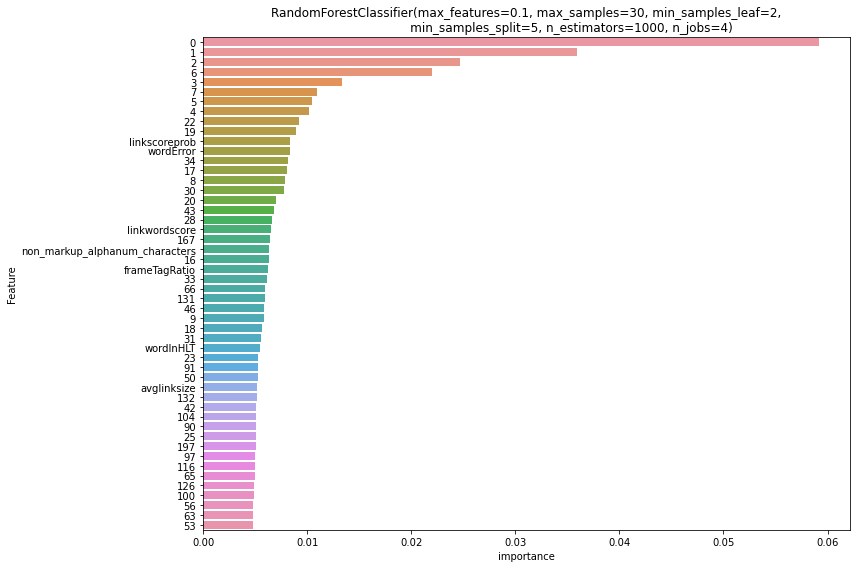

Roc_auc_accu AdaBoostClassifier() 0.8533111577623033


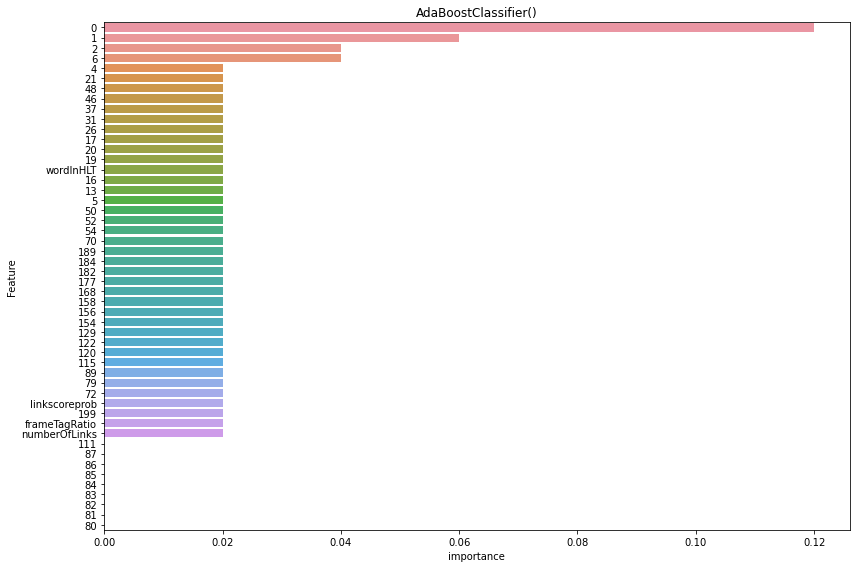

Roc_auc_accu GradientBoostingClassifier(learning_rate=0.08, max_depth=7, max_features=4,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=300) 0.8570891728597344


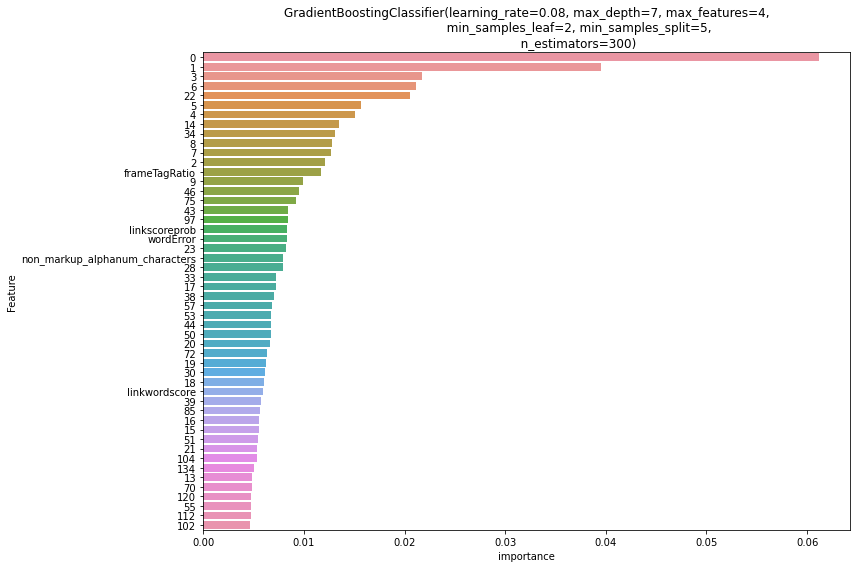

Roc_auc_accu ExtraTreesClassifier() 0.8530505734683129


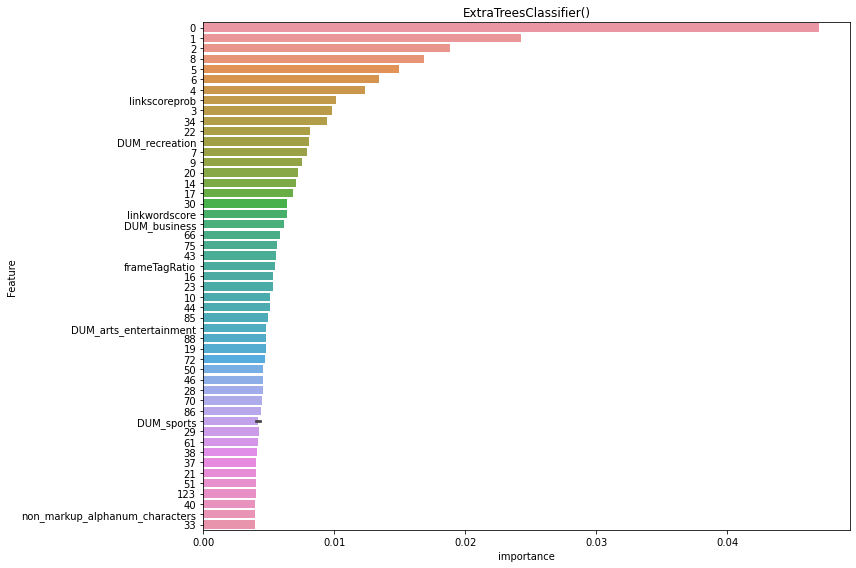

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Roc_auc_accu LGBMClassifier(learning_rate=0.08, max_depth=7, n_estimators=300, num_leaves=50,
               objective='binary', sub_feature=0.5) 0.8655293609924513


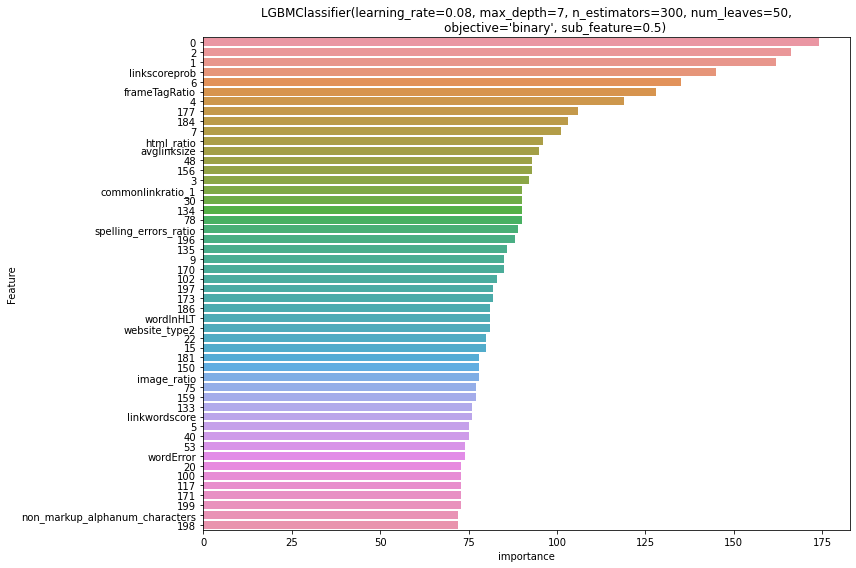

[23:36:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Roc_auc_accu XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 0.8626629337585582


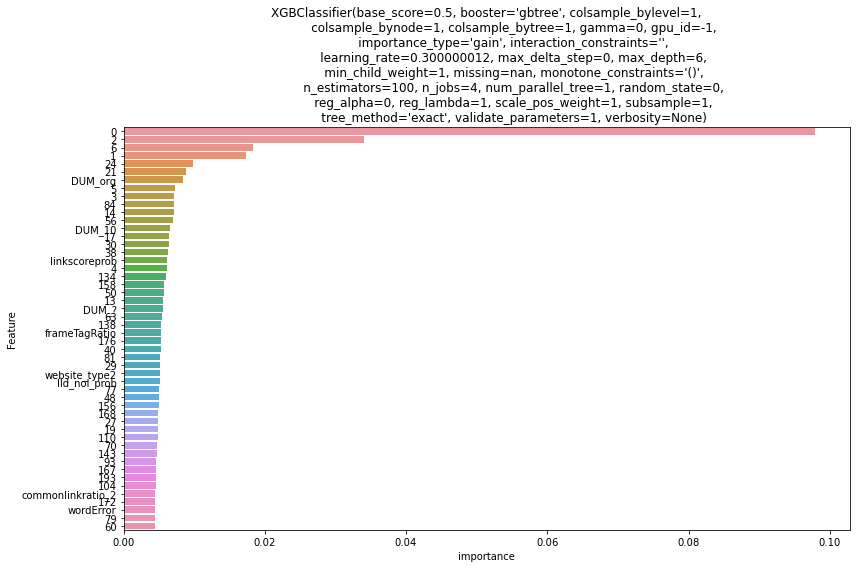

In [55]:
for model in base_classifiers:
    mod = model[1]
    mod.fit(A_train, b_train)
    print("Roc_auc_accu", model[1], roc_auc_score(b_test, mod.predict_proba(A_test)[:, 1]*100))
    fea_importance(data, mod)

## Train model to submission

In [15]:
def voting_prob(lis):
    return np.mean(lis)

In [26]:
pred_prob = []
for i in range(3):
    clf = StackingClassifier(estimators= base_classifiers, final_estimator= LogisticRegression(random_state= 102))
    clf.fit(X_train, y_train)
    x = clf.predict_proba(X_test)[:, 1]
    print(list(x))
    pred_prob.append(x)
    print("=================DONE==================\n")

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:28:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:31:25] WARNING: ../src/learner.cc:1061:

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:36:15] WARNING: ../src/learner.cc:1061:

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:38:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:41:38] WARNING: ../src/learner.cc:1061:

In [27]:
lis = [[] for i in range(dataTest.shape[0])]
for i in range(dataTest.shape[0]):
    for j in range(len(pred_prob)):
            lis[i].append(pred_prob[j][i])
            
rel = []
for i in range(dataTest.shape[0]):
    rel.append(voting_prob(lis[i]))

In [28]:
rel

[0.9158586049029486,
 0.12649164288127432,
 0.16893536283869637,
 0.10248502414161491,
 0.6056728353001427,
 0.34851103277543277,
 0.2794950948121177,
 0.9245223588392397,
 0.30372966529571405,
 0.24301643935899242,
 0.8131032988471922,
 0.5312996478051787,
 0.12746446845374268,
 0.400360272984644,
 0.3678000056737141,
 0.7664704820474406,
 0.8817920775263873,
 0.9234539753201242,
 0.9141273902102937,
 0.1510403065494403,
 0.9026547674248301,
 0.9094088065485301,
 0.8711097113740736,
 0.1668361853770635,
 0.1422298635955099,
 0.32594667107273456,
 0.30185612535882916,
 0.8654160586414994,
 0.18119558152357715,
 0.11961198011828655,
 0.13211988652384898,
 0.1405958133520336,
 0.21271068718045408,
 0.2841907973331655,
 0.8998787645415378,
 0.18898209348597506,
 0.5522011396368435,
 0.926312259422053,
 0.9191129858492763,
 0.5205889630175277,
 0.8997523037158811,
 0.9149174601578317,
 0.20104339648483652,
 0.8386452390257461,
 0.9136954367245794,
 0.9099601062458779,
 0.8928390108937644,


In [29]:
xx = pd.DataFrame({'urlid': dataTest['urlid'],'label': rel})
xx.to_csv('submit.csv', index= False)